In [35]:
import pandas as pd

In [37]:
df=pd.read_csv("kerala_accident_data_with_datetime.csv")

In [39]:
df

,Accident_ID,Date_Time,Latitude,Longitude,Severity,Weather_Condition,Road_Type,Vehicle_Type
0,ACC0001,2023-11-13 07:50:04,11.925776,76.339349,Minor,Foggy,Urban,Car
1,ACC0002,2024-10-01 07:12:56,11.616621,76.953466,Severe,Clear,Urban,Bike
2,ACC0003,2023-07-02 09:49:19,10.458114,74.768419,Minor,Rainy,Rural,Car
3,ACC0004,2024-02-10 09:23:47,11.936447,74.886708,Moderate,Clear,Urban,Car
4,ACC0005,2023-03-03 14:35:48,10.876408,75.207048,Moderate,Rainy,Highway,Bus
...,...,...,...,...,...,...,...,...
995,ACC0996,2025-01-07 05:37:08,9.299732,75.727023,Minor,Clear,Highway,Car
996,ACC0997,2024-09-21 07:58:08,8.853634,75.513562,Minor,Clear,Rural,Car
997,ACC0998,2023-08-22 10:36:55,11.026919,76.266075,Minor,Rainy,Urban,Bus
998,ACC0999,2023-12-25 00:49:06,11.467202,77.397851,Minor,Clear,Urban,Bus


In [41]:
features=['Latitude','Longitude','Severity','Weather_Condition','Road_Type','Vehicle_Type']

In [43]:
df1=df[features]

In [45]:
df1

,Latitude,Longitude,Severity,Weather_Condition,Road_Type,Vehicle_Type
0,11.925776,76.339349,Minor,Foggy,Urban,Car
1,11.616621,76.953466,Severe,Clear,Urban,Bike
2,10.458114,74.768419,Minor,Rainy,Rural,Car
3,11.936447,74.886708,Moderate,Clear,Urban,Car
4,10.876408,75.207048,Moderate,Rainy,Highway,Bus
...,...,...,...,...,...,...
995,9.299732,75.727023,Minor,Clear,Highway,Car
996,8.853634,75.513562,Minor,Clear,Rural,Car
997,11.026919,76.266075,Minor,Rainy,Urban,Bus
998,11.467202,77.397851,Minor,Clear,Urban,Bus


In [47]:
from sklearn.preprocessing import LabelEncoder

In [85]:
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()

In [87]:
df1["Weather_Condition"]=label1.fit_transform(df["Weather_Condition"])
df1["Vehicle_Type"]=label2.fit_transform(df["Vehicle_Type"])
df1["Severity"]=label3.fit_transform(df["Severity"])
df1["Road_Type"]=label4.fit_transform(df["Road_Type"])

C:\Users\Diyanjali\AppData\Local\Temp\ipykernel_147868\2434485995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Weather_Condition"]=label1.fit_transform(df["Weather_Condition"])
C:\Users\Diyanjali\AppData\Local\Temp\ipykernel_147868\2434485995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Vehicle_Type"]=label2.fit_transform(df["Vehicle_Type"])
C:\Users\Diyanjali\AppData\Local\Temp\ipykernel_147868\2434485995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [89]:
df1

,Latitude,Longitude,Severity,Weather_Condition,Road_Type,Vehicle_Type
0,11.925776,76.339349,0,1,2,2
1,11.616621,76.953466,2,0,2,0
2,10.458114,74.768419,0,2,1,2
3,11.936447,74.886708,1,0,2,2
4,10.876408,75.207048,1,2,0,1
...,...,...,...,...,...,...
995,9.299732,75.727023,0,0,0,2
996,8.853634,75.513562,0,0,1,2
997,11.026919,76.266075,0,2,2,1
998,11.467202,77.397851,0,0,2,1


In [91]:
df1.isnull().sum()

Latitude             0
Longitude            0
Severity             0
Weather_Condition    0
Road_Type            0
Vehicle_Type         0
dtype: int64

In [93]:
x=df1[features]

In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.28212874,  0.41072421, -0.74355017,  0.49554175,  1.13241039,
         0.61048771],
       [ 1.0484829 ,  1.12532748,  2.22471398, -0.64889647,  1.13241039,
        -1.3878354 ],
       [ 0.17293391, -1.41725274, -0.74355017,  1.63997996,  0.01563486,
         0.61048771],
       ...,
       [ 0.60281188,  0.32546059, -0.74355017,  1.63997996,  1.13241039,
        -0.38867385],
       [ 0.93555855,  1.64242598, -0.74355017, -0.64889647,  1.13241039,
        -0.38867385],
       [ 1.03151617, -0.99425329, -0.74355017, -0.64889647, -1.10114068,
         1.60964927]])

In [99]:
from sklearn.cluster import KMeans

In [114]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

In [116]:
import matplotlib.pyplot as plt

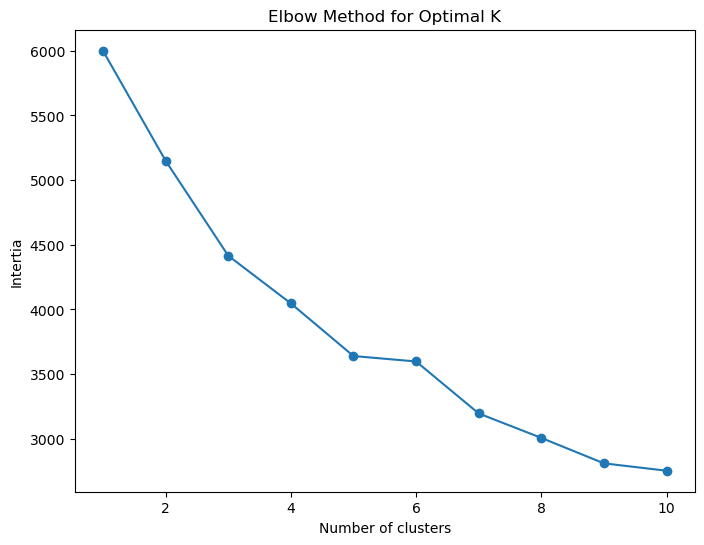

In [118]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

In [122]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) 
df["cluster"] = kmeans.fit_predict(x_scaled)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
